In [2]:
#### Agglomeration of communities ####

import pandas as pd 
import os 
from datetime import datetime 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

import numpy as np

C:\Users\jhroe\AppData\Local\Temp\ipykernel_22732\225963375.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#000000']
cts = ['Alt MAC', 'B cell', 'Cancer', 'Cl MAC', 'Cl Mo', 'DCs cell', 'Endothelial cell', 'Int Mo', 'Mast cell', 'NK cell', 'Neutrophils','Non-Cl Mo', 'T other', 'Tc', 'Th', 'Treg', 'Unknown'][::-1]
ct_order = ['Cancer', 'Endothelial cell',   'Alt MAC', 'Cl MAC', 'Cl Mo','Int Mo', 'Non-Cl Mo', 'DCs cell',  'Neutrophils','Mast cell', 'NK cell', 'B cell', 'T other', 'Tc', 'Th', 'Treg', 'Unknown']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'maroon', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'brown', 'navy', 'aqua', 'teal']
cell_type_colors = {
    'Cancer': '#FF0000',             # Red
    'Alt MAC': '#0000FF',            # blue 
    'Cl MAC': '#4169E1',             # blue
    'Cl Mo': '#0096FF',              # blue
    'Int Mo': '#00FFFF',             # ''
    'Non-Cl Mo': '#87CEEB',          # ''
    'Mast cell': '#FFFF00',          # Yellow
    'B cell': '#C4A484',             # brown
    'DCs cell': '#6A0DAD',           # purple
    'Endothelial cell': '#FFA500',   # Orange
    'NK cell': '#FFC0CB',            # pink
    'Neutrophils': '#FF00FF',        # magenta
    'T other': '#66CDAA',            # green
    'Tc': '#008000',                 # Green
    'Th': '#2E8B57',                 # Green (similar to 'Tc')
    'Treg': '#3CB371',               # Green
    'Unknown': '#808080'             # Gray
}

In [4]:
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
output_dir = f"{data_path}/clustering/"

data = pd.read_csv(f"{data_path}/phenograph_output/{file}", index_col=0)
df = data.iloc[:,3:]
df

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster
1,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [5]:
#### Agglomerative clustering function ####

def agglomerative_clustering(k, average_neighbours, avg_noCluster, agglomerate_to):
    
    # Agglomerative clustering to chosen number of communities as determined by own biological knowledge of the data
    ac1 = AgglomerativeClustering(linkage = 'average', n_clusters = agglomerate_to)
    agglomerate1 = pd.DataFrame(ac1.fit_predict(avg_noCluster))
    # Rename column
    agglomerate1.columns = [f"agglomerateto_{agglomerate_to}"]
    agglomerate1[f"agglomerateto_{agglomerate_to}"] += 1
    # Add agglomerated data to average neighbours 
    average_neighbours = average_neighbours.join(agglomerate1)
   
    print(list(average_neighbours))
    
    # Save data with added columns 
    average_neighbours.to_csv(f"{data_path}clustering/reclustered_{agglomerate_to}.csv", index = False)
    print('dataset saved')

    return pd.DataFrame(average_neighbours)

In [6]:
# Create average_neighbours
centroid_noclus = df.groupby('cluster').mean()
centroids = centroid_noclus.reset_index()
centroid_noclus.head()

,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown
cluster,,,,,,,,,,,,,,,,,
1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247
2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414
3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384
4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788
5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776


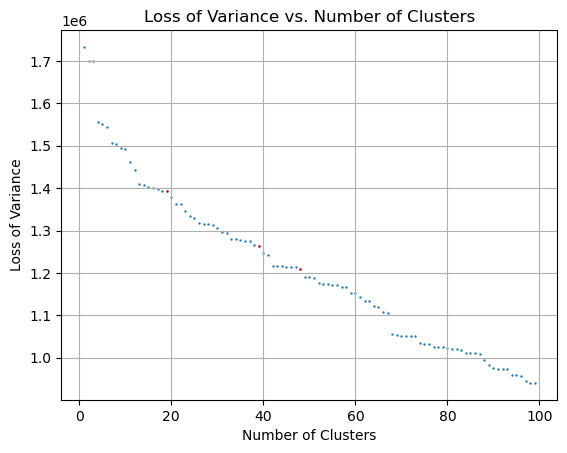

In [7]:
# Function to calculate the loss of variance
def calculate_loss_of_variance(clusters, data):
    loss = 0
    for cluster_id in np.unique(clusters):
        cluster_data = data.loc[clusters == cluster_id, data.columns != 'Cluster']
        centroid = cluster_data.mean(axis=0)
        cluster_loss = np.sum(pairwise_distances(cluster_data, [centroid])**2)
        loss += cluster_loss
    return loss

# Perform agglomerative clustering
n_clusters_range = range(1, 100)  # Define a range of cluster numbers to try
losses = []
num_clusters_left = []

for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(centroids.iloc[:,1:])
    loss = calculate_loss_of_variance(clusters, centroids)
    losses.append(loss)
    num_clusters_left.append(n_clusters)

# Plotting loss of variance after every merge
plt.scatter(num_clusters_left, losses, marker='o', s=0.5)

# Highlight chosen points
plt.scatter(num_clusters_left[18], losses[18], marker='o', s=0.5,color='red')
plt.scatter(num_clusters_left[38], losses[38], marker='o', s=0.5,color='red')
plt.scatter(num_clusters_left[47], losses[47], marker='o', s=0.5,color='red')


plt.xlabel('Number of Clusters')
plt.ylabel('Loss of Variance')
plt.title('Loss of Variance vs. Number of Clusters')
plt.grid(True)
plt.savefig(f'{data_path}clustering_plots/Loss_var__clusno.png', bbox_inches='tight', dpi=300)

plt.show()
# Significant drops in variance occur at merging to 19, 39 and 48

In [8]:
# Agglomerate to 19 communities 
average_neighbours19= agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 19)
# # Agglomerate to 39 communities 
average_neighbours39 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 39)
# Agglomerate to 48 communities 
average_neighbours48 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 48)

average_neighbours48

['cluster', 'Alt.MAC', 'B.cell', 'Cancer', 'Cl.MAC', 'Cl.Mo', 'DCs.cell', 'Endothelial.cell', 'Int.Mo', 'Mast.cell', 'NK.cell', 'Neutrophils', 'Non.Cl.Mo', 'T.other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_19']
dataset saved
['cluster', 'Alt.MAC', 'B.cell', 'Cancer', 'Cl.MAC', 'Cl.Mo', 'DCs.cell', 'Endothelial.cell', 'Int.Mo', 'Mast.cell', 'NK.cell', 'Neutrophils', 'Non.Cl.Mo', 'T.other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_39']
dataset saved
['cluster', 'Alt.MAC', 'B.cell', 'Cancer', 'Cl.MAC', 'Cl.Mo', 'DCs.cell', 'Endothelial.cell', 'Int.Mo', 'Mast.cell', 'NK.cell', 'Neutrophils', 'Non.Cl.Mo', 'T.other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_48']
dataset saved


,cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,Int.Mo,Mast.cell,NK.cell,Neutrophils,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,agglomerateto_48
0,1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247,27
1,2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414,34
2,3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384,47
3,4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788,3
4,5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
271,272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000,19
272,273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000,19
273,274,0.000000,0.084654,0.914201,0.000000,0.000074,0.000069,0.000000,0.000000,0.000078,0.000287,0.000131,0.000000,0.000000,0.000000,0.000045,0.000000,0.000461,19


In [9]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours48
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)

C:\Users\jhroe\AppData\Local\Temp\ipykernel_22732\1119991350.py:16: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]


<Figure size 2000x1000 with 0 Axes>

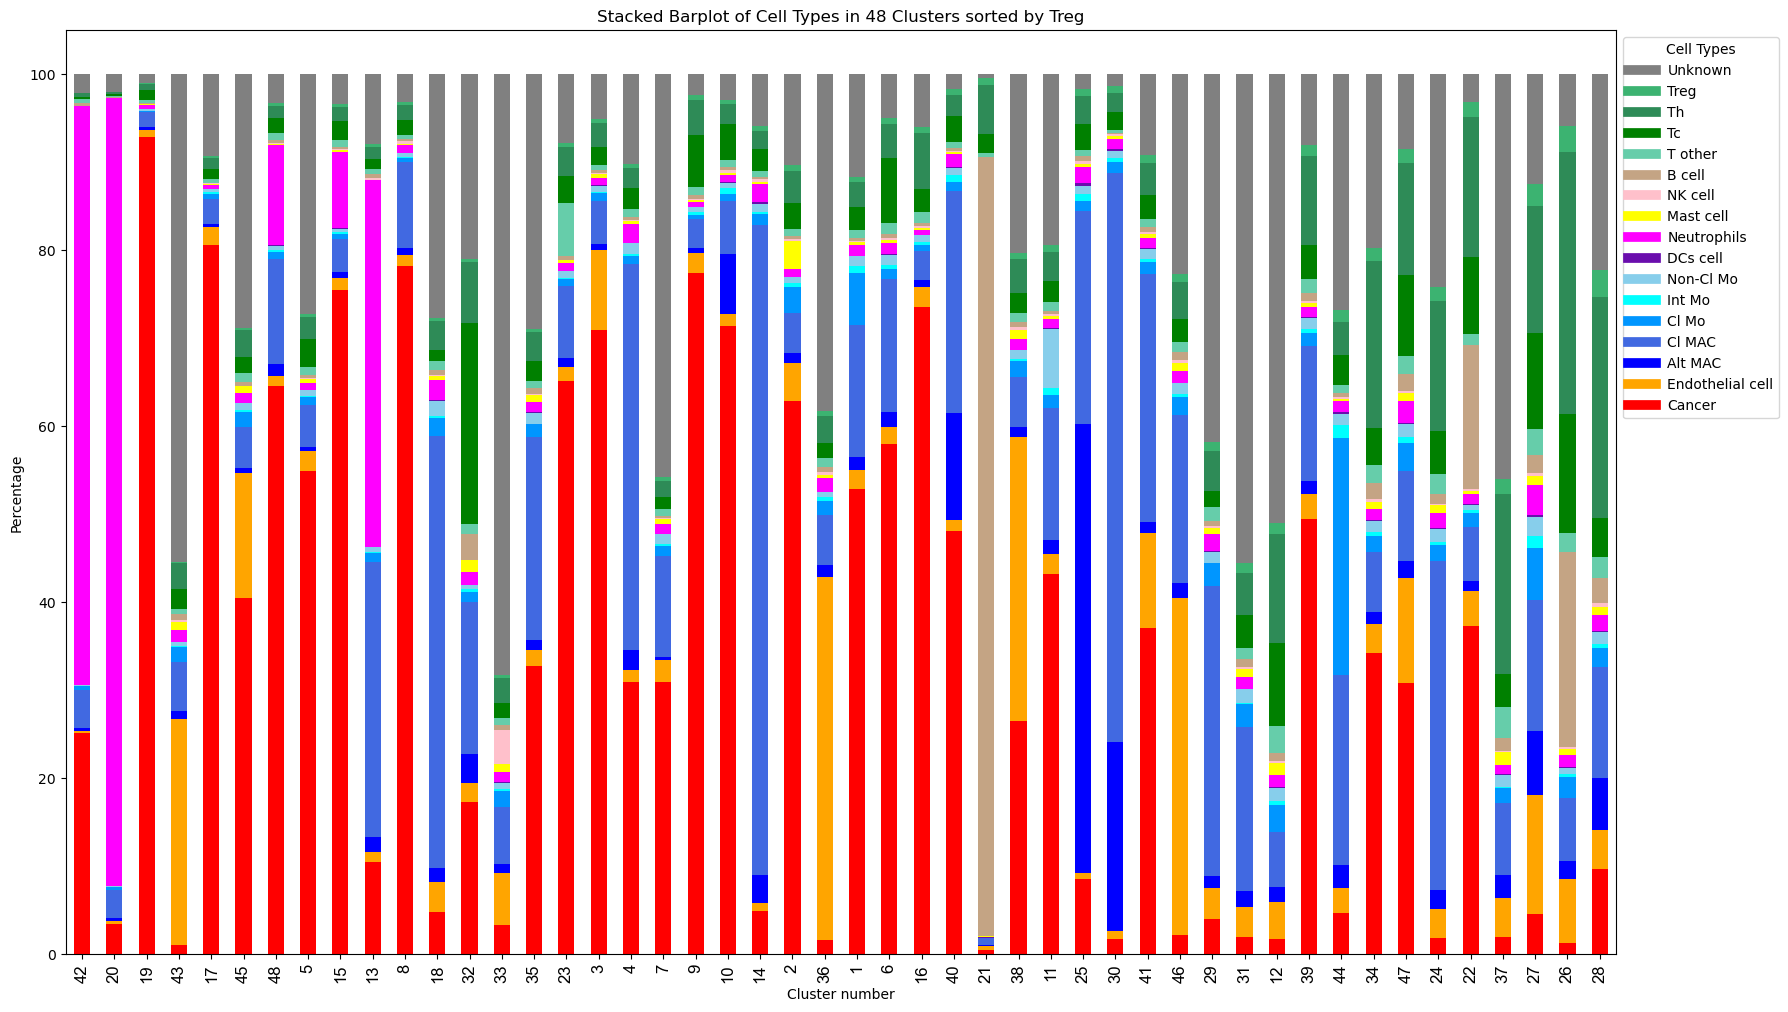

In [10]:
# specify cell type on which to sort
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

In [11]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours39
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)


C:\Users\jhroe\AppData\Local\Temp\ipykernel_22732\1119991350.py:16: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]


<Figure size 2000x1000 with 0 Axes>

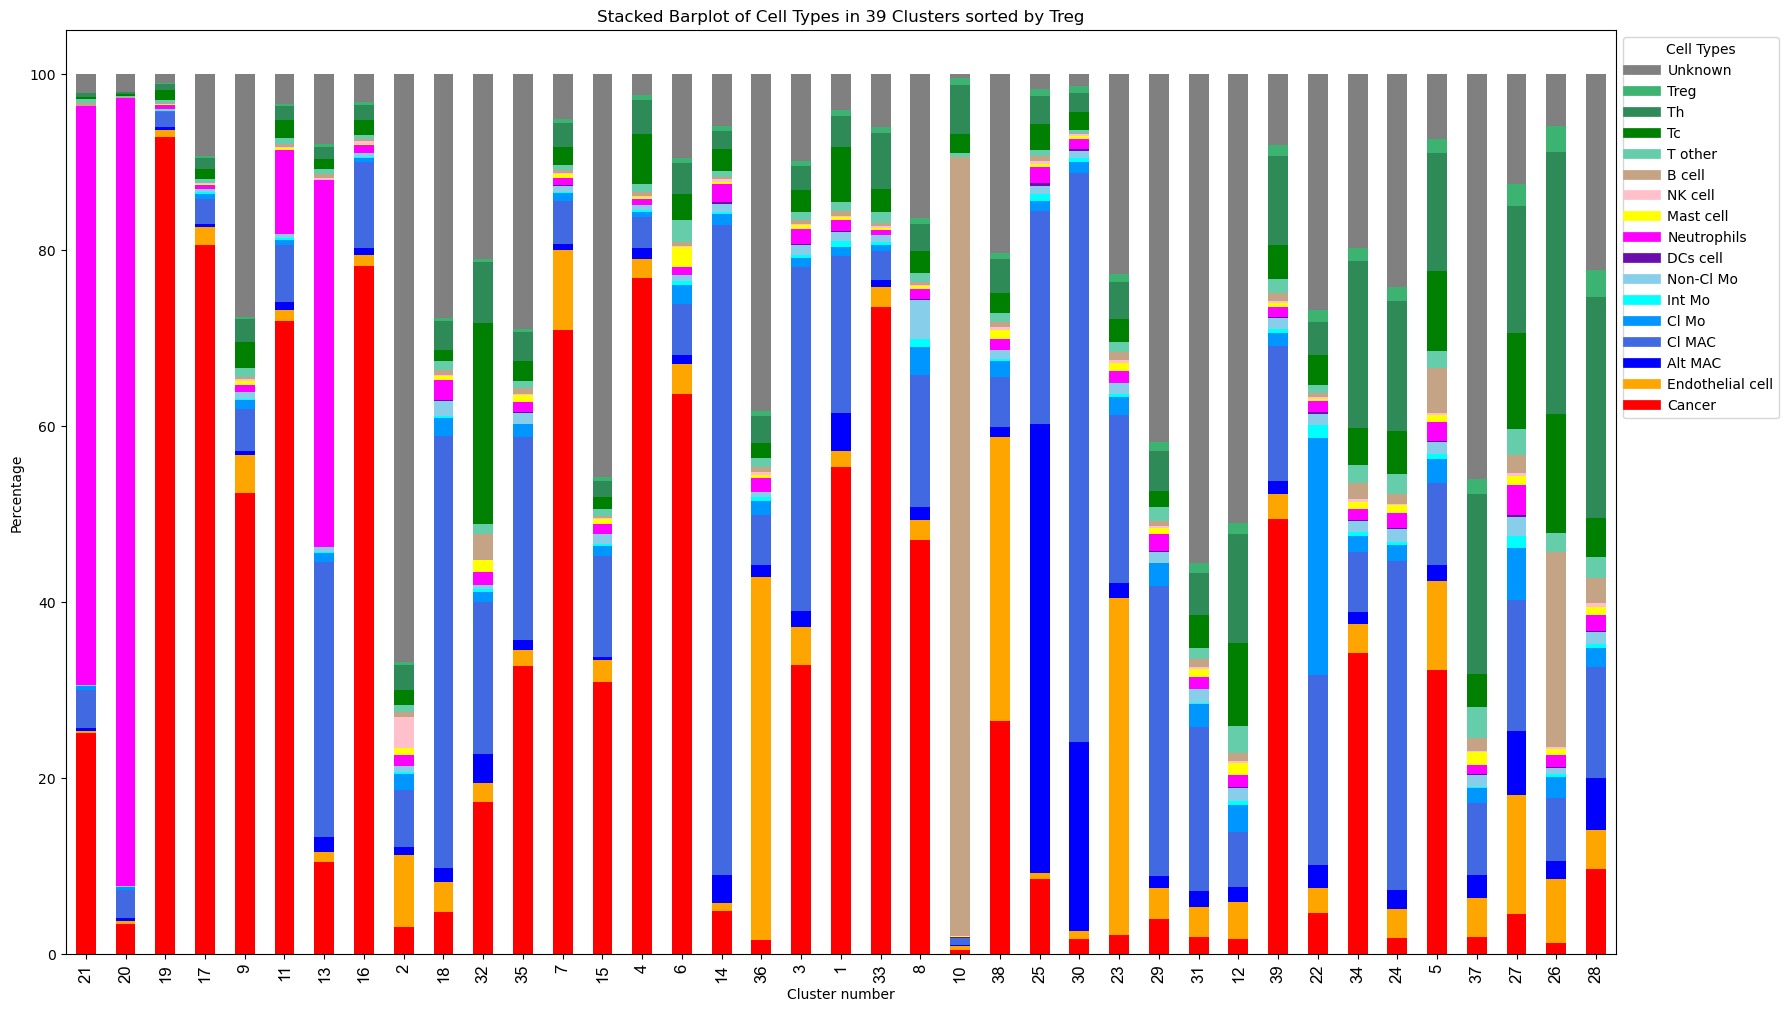

In [12]:
# specify cell type on which to sort
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

In [13]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours19
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)


C:\Users\jhroe\AppData\Local\Temp\ipykernel_22732\1119991350.py:16: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]


<Figure size 2000x1000 with 0 Axes>

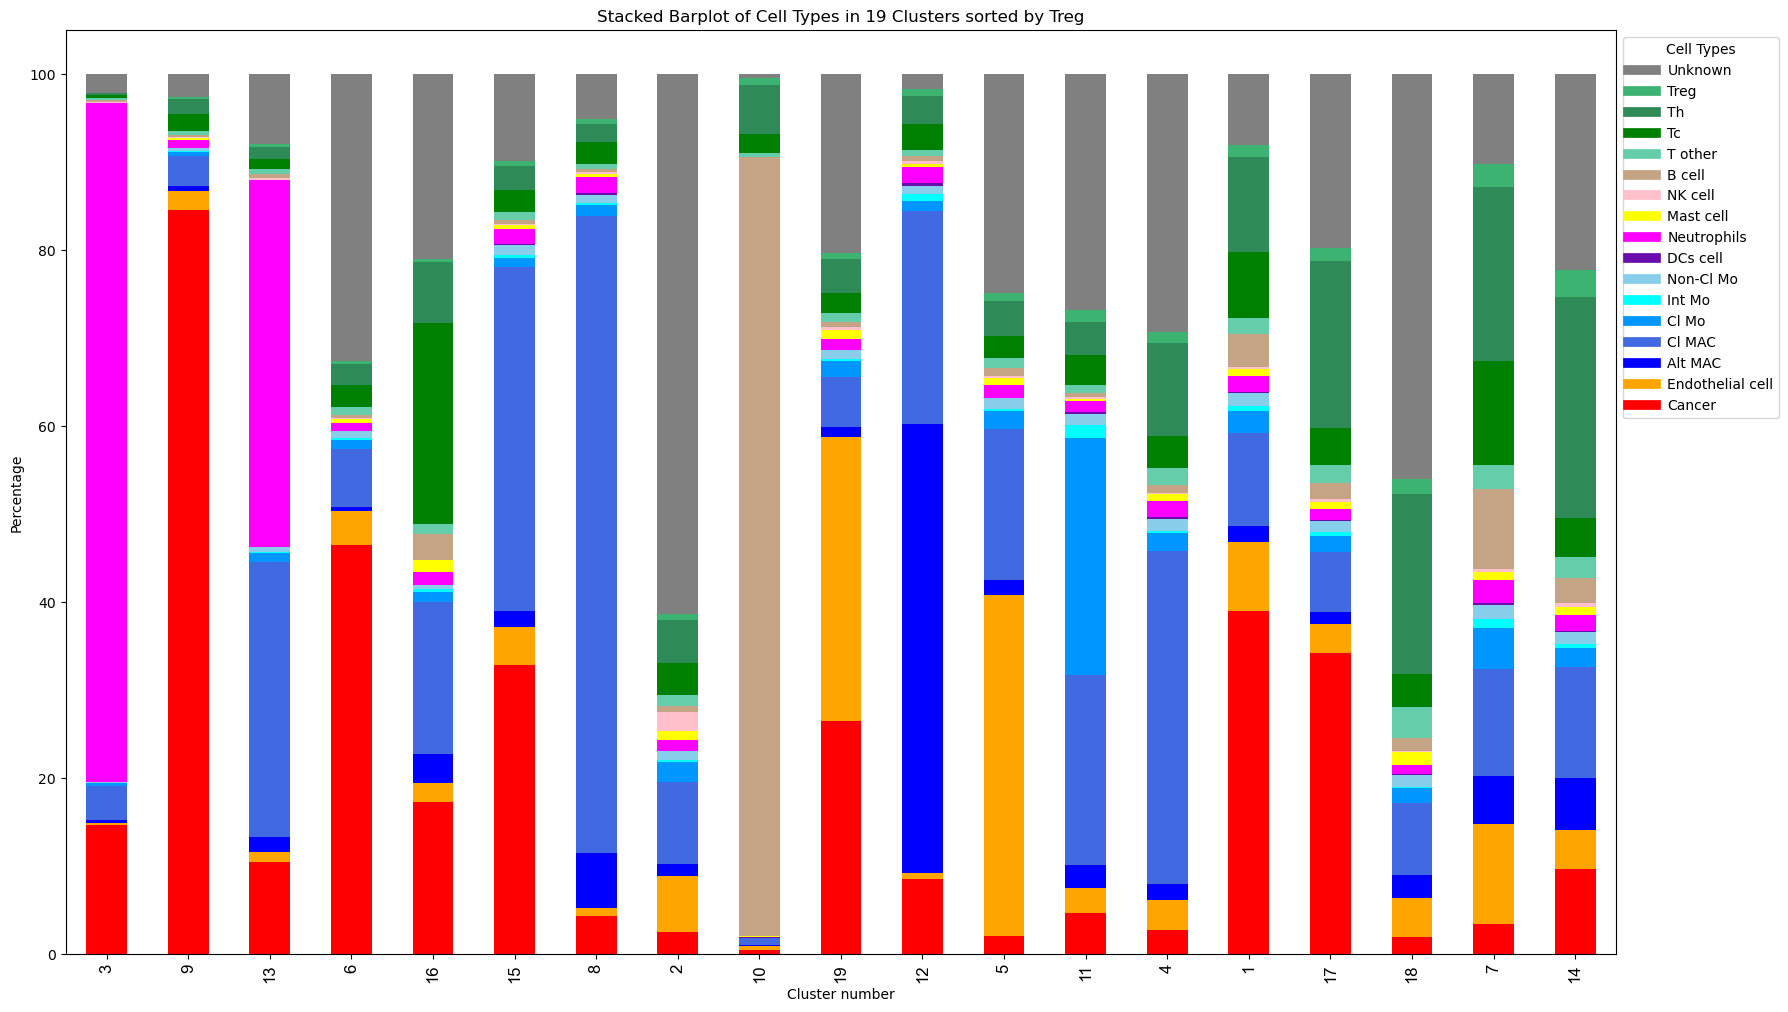

In [14]:
# specify cell type on which to sort
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

In [15]:
# num_clus = 19
key = average_neighbours19[['cluster', f'agglomerateto_19']]
df_clus = pd.merge(data, key, on='cluster', how='inner')
# num_clus = 39
key = average_neighbours39[['cluster', f'agglomerateto_39']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')
# num_clus = 48
key = average_neighbours48[['cluster', f'agglomerateto_48']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')


df_clus


,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,Non.Cl.Mo,T.other,Tc,Th,Treg,Unknown,cluster,agglomerateto_19,agglomerateto_39,agglomerateto_48
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1,7,27,27
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2,17,34,34
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3,1,5,47
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4,9,7,3
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1,7,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44,1,39,39
1637718,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72,1,6,2
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146,2,31,31
1637720,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1,7,27,27


In [16]:
clus_key = df_clus.iloc[:,-5:-1].drop_duplicates()
clus_key

,Unknown,cluster,agglomerateto_19,agglomerateto_39
0,0.000000,1,7,27
1,0.428571,2,17,34
2,0.000000,3,1,5
3,0.142857,4,9,7
4,0.333333,1,7,27
...,...,...,...,...
1612485,0.421053,9,11,22
1612651,0.277778,9,11,22
1612657,0.315789,9,11,22
1612661,0.411765,9,11,22


In [17]:
pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

def above_5(x):
    if x > 5:
        return 1
    else:
        return 0

pi['surv_5y'] = pi['Survival or loss to follow-up (years)'].apply(lambda x: above_5(x))
s5 = pi[['Key','surv_5y']].rename(columns={"Key":"Patient_ID"})
df_clus = pd.merge(df_clus, s5, on='Patient_ID', how='inner')
df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv", index = False)
df_clus


,Patient_ID,source_ID,source_cluster,Alt.MAC,B.cell,Cancer,Cl.MAC,Cl.Mo,DCs.cell,Endothelial.cell,...,T.other,Tc,Th,Treg,Unknown,cluster,agglomerateto_19,agglomerateto_39,agglomerateto_48,surv_5y
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.166667,0.333333,0.000000,0.000000,1,7,27,27,1
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.428571,2,17,34,34,1
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.000000,0.181818,0.090909,0.000000,0.000000,3,1,5,47,1
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.142857,4,9,7,3,1
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.083333,0.083333,0.250000,0.000000,0.333333,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,44,1,39,39,1
1637718,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,72,1,6,2,1
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.333333,146,2,31,31,1
1637720,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.166667,0.333333,0.000000,0.166667,1,7,27,27,1
